In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("c:/dataset/zomato.csv")

In [3]:
#rename columns of dataframe
df.rename(columns={"approx_cost(for two people)":"approx_cost_for_2","listed_in(type)":"listed_in_type","listed_in(city)":"listed_in_city"},inplace=True)
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
#check Duplicate in data frame
d=df.duplicated().sum()
print(f"there are {d} duplicate in df dataframe")

there are 0 duplicate in df dataframe


In [5]:
#check duplicated in each dataframe
duplicate=pd.DataFrame({"col_name":df.columns,"cnt_duplicate":np.linspace(0,0,df.shape[1])})
for i in (np.arange(duplicate.shape[0])):
    col_name = duplicate.loc[i, "col_name"]
    duplicate.loc[i,"cnt_duplicate"] = df[col_name].duplicated().sum()
duplicate

,col_name,cnt_duplicate
0,url,0.0
1,address,40222.0
2,name,42925.0
3,online_order,51715.0
4,book_table,51715.0
5,rate,51652.0
6,votes,49389.0
7,phone,36790.0
8,location,51623.0
9,rest_type,51623.0


In [6]:
#drop url column because its unique for each
df.drop(columns="url",axis=1,inplace=True)

In [7]:
# Change case of the values under selective columns to lower case
for col_name in ['address', 'name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in_type', 
            'listed_in_city']:
    df.loc[:, col_name] = df[col_name].str.lower()

In [8]:
# Check the percentage of record with same or different values in location and listed_in_city columns.

print('Proportion of records with same values : {}%'.format(round(df['location'].eq(df['listed_in_city']).sum() * 100 / df.shape[0], 2)))
print('Proportion of records with different values : {}%'.format(round(df['location'].ne(df['listed_in_city']).sum() * 100 / df.shape[0], 2)))

Proportion of records with same values : 30.98%
Proportion of records with different values : 69.02%


It's very clear from the proportions computed above (especially 69%) that the values contained in the columns location and listed_in_city mean different and contain different

In [9]:
#let us extract location value from address column and compare it with location and listed_in_city fields
location_from_address = pd.Series([list_val[len(list_val) - 2] for list_val in (df.loc[:, 'address'].str.split(','))]).str.strip(' ')
df['location_from_address'] = location_from_address

In [10]:
print('Proportion of records with location and address location not matching : {}%'.\
      format(round(df['location'].ne(df['location_from_address']).sum() * 100 / df.shape[0], 2)))

Proportion of records with location and address location not matching : 10.46%


In [11]:
df.loc[df['location'].ne(df['location_from_address']), ['location', 'location_from_address', 'listed_in_city']].head(50)

,location,location_from_address,listed_in_city
11,banashankari,opposite to bda complex,banashankari
29,basavanagudi,next to more basavanagudi,banashankari
94,banashankari,bangalore,banashankari
106,banashankari,opposite rv college of architecture,banashankari
134,banashankari,banashankri,banashankari
149,banashankari,22nd main,banashankari
170,banashankari,2nd main,banashankari
205,banashankari,banashankri,banashankari
230,basavanagudi,next to more basavanagudi,banashankari
246,vijay nagar,bangalore,banashankari


In [12]:
# Check for duplicate records after dropping "url" column from the data frame.

print('No. of duplicate records in the dataset : {}'.format(df.duplicated().sum()))

No. of duplicate records in the dataset : 44


In [13]:
#name of these duplicate records.
df.loc[df.duplicated(),"name"].unique()

array(['my tea house', 'nawab di biryani', 'vyanjan', 'carrots',
       'eatsomnia', 'rolls & co', 'fogg', 'the paratha stories',
       'mycakeshop', 'bisimillah biriyani',
       "bisimillah biriyani's & kebab's", 'china south', 'chination',
       'desi streat', 'durga sagar', 'happy fillings',
       'marathi biriyani house', "kareem's", 'aubree',
       "mudaliar's kitchen", 'lassi adda', 'sitaar', 'new taj',
       'funky punjab', 'la passion cafe', "royal's biryani",
       'tandoor nation', 'indian kitchen eateries-ike',
       'delish chinese fast food', 'the bridge walk cafe',
       'wedding biryani', 'the oriental spice - ashraya hotel',
       'sai super sandwich', 'rasovara', 'andhra express',
       'shahi family restaurant', 'red onion', 'bootlegger',
       'ithaca - the chancery pavilion', 'boozers bar & kitchen'],
      dtype=object)

In [14]:
#check record for restaurant named"my tea house"
df.loc[(df['name'] == 'my tea house'), ]

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address
23,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],cafes,banashankari,banashankari
268,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,banashankari,banashankari
553,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",dine-out,banashankari,banashankari
596,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",dine-out,banashankari,banashankari
2826,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,basavanagudi,banashankari
4196,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,bellandur,banashankari
9085,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,btm,banashankari
16812,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,hsr,banashankari
17399,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],dine-out,hsr,banashankari
27246,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,koramangala 4th block,banashankari


Observations

We have multiple records for the same restaurant name = "my tea house".
listed_in_type is different for each of these records such as cafes, delivery, dine-out.
Found multiple records with same listed_in_type for same location.
Other fields have same values for the records with same listed_in_type and location.
Let's sort this data on location and listed_in_type fields and double confirm if the records appearing to be duplicate are really duplicate.

In [15]:
df.loc[(df['name'] == 'my tea house'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address
23,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],cafes,banashankari,banashankari
268,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,banashankari,banashankari
2826,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,basavanagudi,banashankari
4196,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,bellandur,banashankari
9085,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,btm,banashankari
16812,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,hsr,banashankari
27246,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,koramangala 4th block,banashankari
30186,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...","['Cream of Chicken Soup', 'Chicken Classic Str...",delivery,koramangala 5th block,banashankari
32994,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...","['Cream of Chicken Soup', 'Chicken Classic Str...",delivery,koramangala 6th block,banashankari
553,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",dine-out,banashankari,banashankari


In [16]:
df.loc[(df['name'] == 'nawab di biryani'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address
7325,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,yes,no,NEW,0,+91 7899298400\r\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",delivery,brookefield,whitefield
7599,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,yes,no,NEW,0,+91 7899298400\r\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",delivery,brookefield,whitefield
50900,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,yes,no,NEW,0,+91 7899298400\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],delivery,whitefield,whitefield
50904,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,yes,no,NEW,0,+91 7899298400\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],delivery,whitefield,whitefield
8244,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,yes,no,NEW,0,+91 7899298400\r\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Veg Lucknowi Biryani', 'Egg Biryani', 'Chick...",dine-out,brookefield,whitefield
51604,"17, thubarahalli village, hobli, varthur main ...",nawab di biryani,no,no,NEW,0,+91 7899298400\n+91 9818654628,whitefield,"takeaway, delivery",NaN,"biryani, mughlai",400,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],dine-out,whitefield,whitefield


For the restaurants "my tea house" and "nawab di biryani", we have found that:

Multiple records with same values in all fields of the dataset.
Multiple records with same values in all fields except listed_in_city field. This could be due to listing of same restaurant (of same location) for different neighboring locations.
We can delete the records with same values in all the fields.

In [17]:
df.shape

(51717, 17)

In [18]:
#delete duplicate record in df 
df.drop(index = df[df.duplicated()].index, inplace = True)
df.reset_index(inplace = True, drop = True)

In [19]:
df.shape

(51673, 17)

In [20]:
#check data after deleting duplicated records
df.loc[(df['name'] == 'my tea house'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address
23,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],cafes,banashankari,banashankari
268,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,banashankari,banashankari
2825,"224/y, 4th phase, 7th block, 100 feet ring roa...",my tea house,yes,no,3.6/5,62,080 65975430\r\n+91 7337733798,banashankari,"quick bites, cafe","Pasta, Iced Tea","italian, fast food, cafe, european",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],delivery,basavanagudi,banashankari
4195,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,bellandur,banashankari
9083,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,btm,banashankari
16790,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,hsr,banashankari
27213,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...",[],delivery,koramangala 4th block,banashankari
30152,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...","['Cream of Chicken Soup', 'Chicken Classic Str...",delivery,koramangala 5th block,banashankari
32960,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...","['Cream of Chicken Soup', 'Chicken Classic Str...",delivery,koramangala 6th block,banashankari
553,"572, 30th main, 3rd stage, banashankari, banga...",my tea house,yes,yes,NEW,0,080 49652475,banashankari,casual dining,NaN,"continental, asian, north indian, tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",dine-out,banashankari,banashankari


In [21]:
df.loc[(df['name'] == 'funky punjab'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address
1313,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.9/5,124,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 4.0', ""RATED\n A joint for authentic...",[],delivery,bannerghatta road,btm
8879,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.9/5,124,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 4.0', ""RATED\n A joint for authentic...",[],delivery,btm,btm
20211,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8/5,125,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],delivery,jayanagar,btm
22420,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8 /5,129,+91 8884449474,btm,quick bites,"Dal Makhani, Roti, Panneer Butter Masala, Lass...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],delivery,jp nagar,btm
27352,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8/5,127,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],delivery,koramangala 4th block,btm
29911,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8 /5,127,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],delivery,koramangala 5th block,btm
32730,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8 /5,127,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...","['Gobi Manchurian', 'Chilly Chicken', 'Dal Khi...",delivery,koramangala 6th block,btm
35390,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.8 /5,128,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],delivery,koramangala 7th block,btm
10612,"746, 7th cross, 13th main, btm, bangalore",funky punjab,yes,no,3.9/5,124,+91 8884449474,btm,quick bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","north indian, chinese",400,"[('Rated 4.0', ""RATED\n A joint for authentic...","['Masala Chaap', 'Gobi Manchurian', 'Chilly Ch...",dine-out,btm,btm
1187,"123(2), 24th main, 5th phase, opposite to roya...",funky punjab,yes,no,3.9/5,407,+91 7829391919\r\r\n+91 7760686868,jp nagar,casual dining,"Lassi, Chole, Palak Paneer, Chaap, Paneer Tikk...","north indian, chinese",500,"[('Rated 4.0', ""RATED\n It's been 4 years we ...",[],delivery,bannerghatta road,jp nagar


For the same restaurant name and location:

a. We have multiple records with same/different listed_in_type and/or same/different listed_in_city.
b. reviews_list column value is not same for any combination of any of the fields. Following are some of the combinations I checked reviews_list for:
(i) rest_type
(ii) cuisines
(iii) listed_in_city + listed_in_type
(iv) address + listed_in_city
(v) address + rate

Therefore, let's consider each record's "reviews_list" as individual review. Parse the ratings from the "reviews_list" of each record and compute average of the ratings. Then, proceed with further analysis.

In [22]:
# Add a column to dataframe to store customer ratings found in reviews_list.

df.insert(loc = df.shape[1], column = 'rvws_rate_list', value = '')

# Add a column to dataframe to store average customer ratings found in reviews_list.

df.insert(loc = df.shape[1], column = 'avg_cust_rate', value = np.nan)

# Add a column to dataframe to store number of rates found in reviews_list.

df.insert(loc = df.shape[1], column = 'no_of_rates', value = np.nan)

In [23]:

df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
0,"942, 21st main road, 2nd stage, banashankari, ...",jalsa,yes,yes,4.1/5,775,080 42297555\r\n+91 9743772233,banashankari,casual dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],buffet,banashankari,banashankari,,NaN,NaN


In [24]:

# Pattern to split string on single quote.
pat_1= re.compile('\'')

# Pattern to substitute with a blank value.
pat_2= re.compile('(Rated\s)+')

# Patter to extract string containg Rated*.
pat_3 = re.compile('Rated*')

# Loop through the dataset based on dataframe index.
for i in df.index:
    rvw_str = df.loc[i, 'reviews_list']
    reviews_str_list = pat_1.split(rvw_str)

    # Extract ratings from the reviews_list and store them as float values in a list.
    df.at[i, 'rvws_rate_list'] = [float(pat_2.sub('', str_val)) for str_val in reviews_str_list if pat_3.match(str_val)]
    
    # Compute average of ratings found in a review list.
    calc_rate_from_rvwlist = np.mean([float(pat_2.sub('', str_val)) for str_val in reviews_str_list if pat_3.match(str_val)])
    calc_rate_from_rvwlist = np.round(calc_rate_from_rvwlist, 1)
    
    # Store average of ratings into avg_cust_rate column.
    df.at[i, 'avg_cust_rate'] = calc_rate_from_rvwlist
    
    # Store no. of ratings into no_of_rates.
    df.at[i, 'no_of_rates'] = len(df.at[i, 'rvws_rate_list'])

C:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
print('% of records with no average customer rate : {}%'.\
      format(round(df['avg_cust_rate'].isna().sum() * 100 / df.shape[0], 2)))

% of records with no average customer rate : 14.69%


In [26]:
# Strip "/5" from "rate" field values.

df.loc[:, 'rate'] = df['rate'].str.rstrip('/5')

In [27]:
df.loc[:, 'rate'] = df['rate'].str.strip()

In [28]:
# Check number of records with characters other than alphanumeric in "rate" columns.

df.loc[df['rate'].str.contains(r'[^\w\.]', na = False), 'rate'].value_counts()

-    69
Name: rate, dtype: int64

In [29]:
# Check if avg_cust_rate contains any character other than alphanumeric.
df.loc[df['avg_cust_rate'].astype(str).str.contains(r'[^\w\.]', na = False), 'avg_cust_rate'].unique()

array([], dtype=float64)

In [30]:
df['avg_cust_rate'].value_counts(dropna = False).head()

NaN    7589
4.0    6429
3.0    3890
5.0    3415
3.5    2628
Name: avg_cust_rate, dtype: int64

In [31]:
df['rate'].value_counts(dropna = False).head()

NaN    7767
3.9    3968
3.8    3870
3.7    3820
3.6    3315
Name: rate, dtype: int64

In [32]:
print('No. of records with rate = NEW & avg_cust_rate notna : {}'.\
      format(df[(df['rate'] == 'NEW') & (df['avg_cust_rate'].notna())].shape[0]))

No. of records with rate = NEW & avg_cust_rate notna : 1048


In [33]:
print('No. of records with rate "-" & avg_cust_rate notna : {}'.\
      format(df[(df['rate'] == '-') & (df['avg_cust_rate'].notna())].shape[0]))

No. of records with rate "-" & avg_cust_rate notna : 24


In [34]:
print('No. of records with rate "-" & avg_cust_rate isna : {}'.\
      format(df[(df['rate'] == '-') & (df['avg_cust_rate'].isna())].shape[0]))

No. of records with rate "-" & avg_cust_rate isna : 45


In [35]:
# Check values of votes field for the records with rate = '-' and avg_cust_rate isna.
df.loc[(df['rate'] == '-') & (df['avg_cust_rate'].isna()), 'votes'].value_counts()

0    45
Name: votes, dtype: int64

In [36]:
print('No. of records with rate NaN & avg_cust_rate notna : {}'.\
      format(df[(df['rate'].isna()) & (df['avg_cust_rate'].notna())].shape[0]))

No. of records with rate NaN & avg_cust_rate notna : 2496


In [37]:
print('No. of records with rate not-NaN & NEW & avg_cust_rate isna : {}'.\
      format(df[((df['rate'].notna()) & (df['rate'] != 'NEW')) & 
                         (df['avg_cust_rate'].isna())].shape[0]))

No. of records with rate not-NaN & NEW & avg_cust_rate isna : 1165


In [38]:
filter_cond = (df['rate'] == 'NEW') & (df['avg_cust_rate'].notna())
df.loc[filter_cond, 'rate'] = df.loc[filter_cond, 'avg_cust_rate']

In [39]:
df.head(1)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
0,"942, 21st main road, 2nd stage, banashankari, ...",jalsa,yes,yes,4.1,775,080 42297555\r\n+91 9743772233,banashankari,casual dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],buffet,banashankari,banashankari,"[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...",4.1,12.0


In [40]:
filter_cond = (df['rate'] == '-') & (df['avg_cust_rate'].notna())
df.loc[filter_cond, 'rate'] = df.loc[filter_cond, 'avg_cust_rate']

In [41]:
filter_cond = (df['rate'].isna()) & (df['avg_cust_rate'].notna())
df.loc[filter_cond, 'rate'] = df.loc[filter_cond, 'avg_cust_rate']

In [42]:
 #Set rate and avg_cust_rate to 0 (zero) for the records with votes = 0 with an assumption that these restaurants 
# have been opened recently and not rated/visited by the customers.

filter_cond = ((df['rate'] == '-') & (df['avg_cust_rate'].isna()))
df.loc[filter_cond, 'rate'] = 0
df.loc[filter_cond, 'avg_cust_rate'] = 0

In [43]:
filter_cond = ((df['rate'].notna()) & (df['rate'] != 'NEW')) & (df['avg_cust_rate'].isna())
df.loc[filter_cond, 'avg_cust_rate'] = df.loc[filter_cond, 'rate'].astype('float64')

In [44]:
print('No. of records with rate = NEW & avg_cust_rate notna : {}'.\
      format(df[(df['rate'] == 'NEW') & (df['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate "-" & avg_cust_rate notna : {}'.\
      format(df[(df['rate'] == '-') & (df['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate NaN & avg_cust_rate notna : {}'.\
      format(df[(df['rate'].isna()) & (df['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate not-NaN & NEW & avg_cust_rate isna : {}'.\
      format(df[((df['rate'].notna()) & (df['rate'] != 'NEW')) & 
                         (df['avg_cust_rate'].isna())].shape[0]))

print('No. of records with rate "-" & avg_cust_rate isna : {}'.\
      format(df[(df['rate'] == '-') & (df['avg_cust_rate'].isna())].shape[0]))

No. of records with rate = NEW & avg_cust_rate notna : 0
No. of records with rate "-" & avg_cust_rate notna : 0
No. of records with rate NaN & avg_cust_rate notna : 0
No. of records with rate not-NaN & NEW & avg_cust_rate isna : 0
No. of records with rate "-" & avg_cust_rate isna : 0


In [45]:
df.loc[(df['rate'] == 'NEW') | (df['rate'].isna()), 'rate'].value_counts(dropna = False)

NaN    5271
NEW    1153
Name: rate, dtype: int64

In [46]:
df.loc[df['avg_cust_rate'].isna(), 'avg_cust_rate'].value_counts(dropna = False)

NaN    6424
Name: avg_cust_rate, dtype: int64

In [47]:
df.loc[((df['rate'] == 'NEW') | (df['rate'].isna())) & df['avg_cust_rate'].isna()].shape[0]

6424

Note: Records with NEW or NaN in rate column have NaN in avg_cust_rate column as well.

Observation:
Few more records exist with NEW or NaN in rate and avg_cust_rate columns in spite of above updates.

In [48]:
df.loc[(df['rate'] == 'NEW') | (df['rate'].isna()), ].\
groupby('votes')['votes'].count()

votes
0      6408
4         7
5         3
6         3
132       1
167       1
283       1
Name: votes, dtype: int64

In [49]:
df.loc[df['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

votes
0      6408
4         7
5         3
6         3
132       1
167       1
283       1
Name: votes, dtype: int64

Assumption:
Restaurants with votes = 0 have been started recently and are yet to receive customer orders (in turn votes and rating as well)
let's set rate and avg_cust_rate to 0 for these restaurants.

In [50]:
df.loc[((df['rate'] == 'NEW') | (df['rate'].isna())) & (df['votes'] == 0), 'rate'] = 0
df.loc[df['avg_cust_rate'].isna() & (df['votes'] == 0), 'avg_cust_rate'] = 0

In [51]:
df.loc[(df['rate'] == 'NEW') | (df['rate'].isna()), ].\
groupby('votes')['votes'].count()

votes
4      7
5      3
6      3
132    1
167    1
283    1
Name: votes, dtype: int64

In [52]:
df.loc[df['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

votes
4      7
5      3
6      3
132    1
167    1
283    1
Name: votes, dtype: int64

In [53]:
for rest_name in df.loc[((df['rate'] == 'NEW') | (df['rate'].isna())) & (df['votes'] != 0), 'name'].unique():
    filter_cond = (df['name'] == rest_name) & ((df['rate'] == 'NEW') | (df['rate'].isna()))
    
    median_value = df.loc[(df['name'] == rest_name) & ((df['rate'] != 'NEW') & (df['rate'].notna())), 'rate'].astype('float64').agg('median')
    
    df.loc[filter_cond, 'rate'] = median_value
    df.loc[filter_cond, 'avg_cust_rate'] = median_value

In [54]:
# Check no. of records with NEW or NaN in "rate" column.

df.loc[(df['rate'] == 'NEW') | (df['rate'].isna()), ].groupby('votes')['votes'].count()

Series([], Name: votes, dtype: int64)

In [55]:
# Check no. of records with NaN in "avg_cust_rate" column.

df.loc[df['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

Series([], Name: votes, dtype: int64)

In [56]:
# Check if "rate" contains any character other than alphanumeric.

df.loc[df['rate'].str.contains(r'[^\w\.]', na = False), 'rate'].unique()

array([], dtype=object)

In [57]:
 #Convert "rate" column from int64 to float64.

df['rate'] = df['rate'].astype('float64')

In [58]:
#Check if "approx_cost_for_2" contains any character other than alphanumeric.

df.loc[df['approx_cost_for_2'].str.contains(r'[^\w\.]', na = False), 'approx_cost_for_2'].unique()

array(['1,200', '1,000', '1,500', '1,300', '1,100', '1,600', '1,700',
       '1,400', '1,350', '2,200', '2,000', '1,800', '1,900', '2,500',
       '2,100', '3,000', '2,800', '3,400', '1,250', '3,500', '4,000',
       '2,400', '2,600', '1,450', '3,200', '6,000', '1,050', '2,300',
       '4,100', '5,000', '3,700', '1,650', '2,700', '4,500'], dtype=object)

In [59]:
# Remove comma character from approx_cost_for_2 column values.

df['approx_cost_for_2'] = df['approx_cost_for_2'].str.replace(',', '')

In [60]:
# Convert approx_cost_for_2 from object to float64.

df['approx_cost_for_2'] = df['approx_cost_for_2'].astype('float64')

In [61]:
# Check % of missing values in each column of the dataset.

round(df.isna().sum() * 100 / df.shape[0], 2)

address                   0.00
name                      0.00
online_order              0.00
book_table                0.00
rate                      0.00
votes                     0.00
phone                     2.34
location                  0.04
rest_type                 0.44
dish_liked               54.27
cuisines                  0.09
approx_cost_for_2         0.67
reviews_list              0.00
menu_item                 0.00
listed_in_type            0.00
listed_in_city            0.00
location_from_address     0.00
rvws_rate_list            0.00
avg_cust_rate             0.00
no_of_rates               0.00
dtype: float64

In [62]:
# Check number of negative values in int64 and/or float64 columns.

[[col_name, df[col_name].lt(0).sum()] for col_name in \
 df.select_dtypes(include = ['int64', 'float64']).columns.tolist()]

[['rate', 0],
 ['votes', 0],
 ['approx_cost_for_2', 0],
 ['avg_cust_rate', 0],
 ['no_of_rates', 0]]

First let's focus on imputing missing values of variables location, rest_type, cuisines & approx_cost_for_2.

In [63]:
# Extract 2nd element from end of "address" string and set it as value of "location" column which has missing values.

for i in df.loc[df['location'].isna(), 'address'].index:
    address_list = df.loc[i, 'address'].split(',')
    no_of_ele_list = len(address_list)
    df.loc[i, 'location'] = address_list[no_of_ele_list - 2].strip()

In [64]:
# Set missing values in "rest_type" column with mode(rest_type) of the restaurant to which this record belongs.

for i in df.loc[df['rest_type'].isna(), ].index:
    rest_name = df.loc[i, 'name']
    
    mode_of_rest_type = df.loc[df['name'] == rest_name, 'rest_type'].mode().tolist()
    
    if isinstance(mode_of_rest_type, list) and mode_of_rest_type:
        mode_of_rest_type = mode_of_rest_type[0]
    
    if mode_of_rest_type:
        df.loc[i, 'rest_type'] = mode_of_rest_type

In [65]:
#Set missing values in "cuisines" column with mode(cuisines) of the restaurant to which this record belongs.

for i in df.loc[df['cuisines'].isna(), ].index:
    rest_name = df.loc[i, 'name']
    
    mode_of_cuisines = df.loc[df['name'] == rest_name, 'cuisines'].mode().tolist()
 
    if isinstance(mode_of_cuisines, list) and mode_of_cuisines:
        mode_of_cuisines = mode_of_cuisines[0]
    
    if mode_of_cuisines:
        df.loc[i, 'cuisines'] = mode_of_cuisines

In [66]:
# Set missing values in "approx_cost_for_2" column with mode(rest_type) of the restaurant to which this record belongs.

for i in df.loc[df['approx_cost_for_2'].isna(), ].index:
    rest_name = df.loc[i, 'name']
    
    mode_of_cost = df.loc[df['name'] == rest_name, 'approx_cost_for_2'].median()
    
    if ~np.isnan(mode_of_cost):
        df.loc[i, 'approx_cost_for_2'] = round(mode_of_cost)

In [67]:
# Check % of missing values in each column of the dataset.

round(df.isna().sum() * 100 / df.shape[0], 2)

address                   0.00
name                      0.00
online_order              0.00
book_table                0.00
rate                      0.00
votes                     0.00
phone                     2.34
location                  0.00
rest_type                 0.22
dish_liked               54.27
cuisines                  0.02
approx_cost_for_2         0.27
reviews_list              0.00
menu_item                 0.00
listed_in_type            0.00
listed_in_city            0.00
location_from_address     0.00
rvws_rate_list            0.00
avg_cust_rate             0.00
no_of_rates               0.00
dtype: float64

After imputing missing values of the variables location, rst_type, cuisines and approx_cost_for_2, we still have some records with missing values in these variables. Let's have a look at other variables with missing values i.e. phone and dish_liked.

In [68]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
0,"942, 21st main road, 2nd stage, banashankari, ...",jalsa,yes,yes,4.1,775,080 42297555\r\n+91 9743772233,banashankari,casual dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],buffet,banashankari,banashankari,"[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...",4.1,12.0
1,"2nd floor, 80 feet road, near big bazaar, 6th ...",spice elephant,yes,no,4.1,787,080 41714161,banashankari,casual dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],buffet,banashankari,banashankari,"[4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...",3.6,14.0
2,"1112, next to kims medical college, 17th cross...",san churro cafe,yes,no,3.8,918,+91 9663487993,banashankari,"cafe, casual dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],buffet,banashankari,banashankari,"[3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.0, 4.0, ...",3.2,20.0
3,"1st floor, annakuteera, 3rd stage, banashankar...",addhuri udupi bhojana,no,no,3.7,88,+91 9620009302,banashankari,quick bites,Masala Dosa,"south indian, north indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],buffet,banashankari,banashankari,"[4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.5, ...",3.7,35.0
4,"10, 3rd floor, lakshmi associates, gandhi baza...",grand village,no,no,3.8,166,+91 8026612447\r\n+91 9901210005,basavanagudi,casual dining,"Panipuri, Gol Gappe","north indian, rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],buffet,banashankari,basavanagudi,"[4.0, 4.0]",4.0,2.0


In [69]:
# List the name of restaurants with multiple records in the dataset.

tmp_rest_mult_recs = df.groupby('name')['name'].count() > 1
tmp_rest_mult_recs.index[tmp_rest_mult_recs == True].tolist()

['#feeltheroll',
 '#l-81 cafe',
 '#refuel',
 '#vibes restro',
 '1000 b.c',
 '100ã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x82ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â°c',
 '11 to 11 express biriyanis',
 '1131 bar + kitchen',
 '12th main - grand mercure',
 '1441 pizzeria',
 '1522 - the pub',
 '154 breakfast club',
 '1722 urban bistro',
 '18+ ice cafe',
 '1947',
 '1980s games cafe',
 '1992 chats - space',
 '1q1',
 '2 statez',
 '20 char - sterlings mac hotel',
 '20 feet high',
 '21 c - la marvella sarovar premiere hotel',
 '21 corner haus cafe',
 '24 carats - the capitol',
 '24 hours cake delivery',
 '24 hours coffee drop - la classic',
 '24/7 - the lalit ashok bangalore',
 '24/7 food service',
 '24@43 - the oterra',
 '24th main',
 '29 degrees north',
 '2nd home restaurant',
 '3 leafs',
 '3 spice',
 '30 square',
 '360 atoms restaurant and cafe',
 '36th cross coffee mane',
 '37 china town',
 '38 sugar lane',
 "3b's - buddies, bar & barbecues",
 "3g's - gulp & groove",
 '3ice cubes',
 '3rd innings',


In [70]:
df.loc[df['name'] == '1947', ].sort_values(by = 'location', axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
63,"296, ram towers, 100 feet ring road, banashank...",1947,no,yes,4.0,808,080 26791213\r\n+91 9739989446,banashankari,casual dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","north indian, chinese",850.0,"[('Rated 4.0', 'RATED\n Excellent food I had ...",[],delivery,banashankari,banashankari,"[4.0, 4.0, 5.0, 4.0, 4.0, 4.0]",4.2,6.0
572,"296, ram towers, 100 feet ring road, banashank...",1947,no,yes,4.0,808,080 26791213\r\r\r\r\n+91 9739989446,banashankari,casual dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","north indian, chinese",850.0,"[('Rated 4.0', 'RATED\n Excellent food I had ...",[],dine-out,banashankari,banashankari,"[4.0, 4.0, 5.0, 4.0, 4.0, 4.0]",4.2,6.0
2484,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2303,080 41261947\r\n+91 9739989453,jayanagar,casual dining,"Palak Paneer, Aam Panna, Crispy Corn, Gajar Ka...","north indian, chinese",950.0,"[('Rated 5.0', ""RATED\n After roaming around ...",[],buffet,basavanagudi,jayanagar,"[5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, ...",3.4,89.0
3028,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2303,080 41261947\r\n+91 9739989453,jayanagar,casual dining,"Palak Paneer, Aam Panna, Crispy Corn, Gajar Ka...","north indian, chinese",950.0,"[('Rated 5.0', ""RATED\n After roaming around ...",[],delivery,basavanagudi,jayanagar,"[5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, ...",3.6,59.0
3445,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2359,080 41261947\n+91 9739989453,jayanagar,casual dining,"Pasta, Tomato Soup, Salad, Kulcha, Chaat, Kulf...","north indian, chinese",950.0,"[('Rated 4.0', ""RATED\n Been here twice now a...",[],dine-out,basavanagudi,jayanagar,"[4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, ...",3.9,40.0
19361,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2309,080 41261947\r\n+91 9739989453,jayanagar,casual dining,"Palak Paneer, Aam Panna, Crispy Corn, Gajar Ka...","north indian, chinese",950.0,"[('Rated 4.0', 'RATED\n This is a pure vegeta...",[],buffet,jayanagar,jayanagar,"[4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, ...",3.6,29.0
20204,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2312,080 41261947\r\n+91 9739989453,jayanagar,casual dining,"Palak Paneer, Aam Panna, Crispy Corn, Gajar Ka...","north indian, chinese",950.0,"[('Rated 4.0', 'RATED\n This restaurant serve...",[],delivery,jayanagar,jayanagar,"[4.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 4.0, ...",3.5,44.0
21013,"62, the high street building, 5th floor, 4t bl...",1947,no,yes,4.1,2317,080 41261947\r\n+91 9739989453,jayanagar,casual dining,"Palak Paneer, Aam Panna, Crispy Corn, Gajar Ka...","north indian, chinese",950.0,"[('Rated 4.0', 'RATED\n This place serves gre...",[],dine-out,jayanagar,jayanagar,"[4.0, 4.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, ...",3.7,25.0
39374,"5, 4th floor, above girias, 15th cross, malles...",1947,no,yes,4.0,1070,080 41314321\n+91 9739989448,malleshwaram,casual dining,"Jal-jeera, Roti, Dhokla, Biryani, Kheer, Chaac...","north indian, chinese",950.0,"[('Rated 4.0', 'RATED\n Went here for a buffe...",[],buffet,malleshwaram,malleshwaram,"[4.0, 4.0, 1.0, 4.0, 4.0, 3.0, 4.0, 5.0, 1.0, ...",3.4,13.0
39778,"5, 4th floor, above girias, 15th cross, malles...",1947,no,yes,4.0,1070,080 41314321\n+91 9739989448,malleshwaram,casual dining,"Jal-jeera, Roti, Dhokla, Biryani, Kheer, Chaac...","north indian, chinese",950.0,"[('Rated 4.0', 'RATED\n Went here for a buffe...",[],delivery,malleshwaram,malleshwaram,"[4.0, 4.0, 1.0, 4.0, 4.0, 3.0, 4.0, 5.0, 1.0, ...",3.4,13.0


Observations on restaurant "1947":

This restaurant is situated in 4 locations in Bengaluru city namely Banashankari, Jayanagar, Malleshwaram & Rajajinagar.
The restaurant situated in each area have been listed in other areas such as Basavanagudi along with the locality in which it is situated.
Every outlet of this restaurant in every area has been listed as separate entry based on the features restaurant have such as Dine-out, Buffet & Delivery.
For e.g. Restaurant situated in Banashankari has been listed for the same locality for two different types: one is for Delivery and the other for Dine-out. Similarly, outlet present in Jayanagar has been listed for it self and for Basavangudi as well for different types Buffet, Delivery and Dine-out.

And the votes column values are different for the same restaurant situated in same location and listed in same/different neighbouring location and with different listed_in_type.
For e.g. No. of votes is 2303, 2359 and 2303 are the outlet situated in Jayanagar and listed for Basavanagudi for 3 different types Dine-out, Delivery and Buffet, respectively.

Average customer rating is different in some cases based on the locality in which it is being listed and/or the location in which the outlet is situated.
For e.g. Average customer rating is 3.7 for all types for the outlet situated in Rajajinagar and listed for the same locality. However, 3.4, 3.6 and 3.9 are the average customer ratings for the outlet situated in Jayanagar and listed for Basavanagudi for types Buffet, Delivery and Dine-out, respectively.

In [71]:
# List the records for name = "eat.fit" sorted ascending by "location".

df.loc[df['name'] == "eat.fit", ].sort_values(by = 'location', axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
3802,"39/12, 5th main road, iblur village, outer rin...",eat.fit,yes,no,4.4,632,NaN,bellandur,delivery,"Buddha Bowl, Chicken Curry, Brownie, Chole, Ve...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...","['Fruit Pop Oatmeal Bowl', 'Idli-Sambar With C...",delivery,bellandur,bellandur,"[4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",3.8,36.0
4471,"39/12, 5th main road, iblur village, outer rin...",eat.fit,yes,no,4.4,632,NaN,bellandur,delivery,"Buddha Bowl, Chicken Curry, Brownie, Chole, Ve...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...","['Fruit Pop Oatmeal Bowl', 'Idli-Sambar With C...",desserts,bellandur,bellandur,"[4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",4.0,55.0
48851,"39/12, 5th main road, iblur village, outer rin...",eat.fit,yes,no,4.4,650,NaN,bellandur,delivery,"Buddha Bowl, Chicken Curry, Raita, Brownie, Ch...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', ""RATED\n Food: 4/5\nPackaging:...","['Spinach Omelette With Roast Potato Wedges', ...",delivery,sarjapur road,bellandur,"[4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",3.7,80.0
16927,"39/12, 5th main road, iblur village, outer rin...",eat.fit,yes,no,4.0,634,NaN,bellandur,delivery,"Buddha Bowl, Chicken Curry, Brownie, Chole, Ve...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 5.0', 'RATED\n I have been ordering ...",[],desserts,hsr,bellandur,"[5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, ...",4.0,45.0
921,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.0,1178,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...",[],delivery,bannerghatta road,btm,"[2.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",4.5,51.0
1939,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.0,1179,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...",[],desserts,bannerghatta road,btm,"[2.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",4.4,80.0
34836,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.5,1195,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Lucknowi Veg Biryani', 'Lucknowi Chicken Bir...",delivery,koramangala 7th block,btm,"[2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",4.6,102.0
32208,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.5,1193,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Chicken Keema Parantha Wrap', 'Lucknowi Chic...",delivery,koramangala 6th block,btm,"[2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",4.4,109.0
29314,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.6,1193,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['Chicken Keema Parantha Wrap', 'Lucknowi Chic...",delivery,koramangala 5th block,btm,"[2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, ...",4.6,111.0
8397,"96, 29th main, 23rd cross, 2nd stage, btm, ban...",eat.fit,yes,no,4.0,1181,NaN,btm,delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...","['

In [72]:
# List the records for name = "eat.fit" for "Whitefield" location sorted ascending by "listed_in_city" column.

df.loc[(df['name'] == "eat.fit") & (df['location'] == 'whitefield'), ].sort_values(by = 'listed_in_city', axis = 0)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_2,reviews_list,menu_item,listed_in_type,listed_in_city,location_from_address,rvws_rate_list,avg_cust_rate,no_of_rates
7092,"32/2g, ncpr industrial layout, doddanakundi in...",eat.fit,yes,no,4.4,1034,NaN,whitefield,delivery,"Hyderabadi Chicken, Murgh Khurchan, Rajma, Bro...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n Quite higher price. D...","['Fruit Pop Oatmeal Bowl', 'Lucknowi Veg Birya...",delivery,brookefield,whitefield,"[4.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 4.0, ...",4.2,96.0
7696,"32/2g, ncpr industrial layout, doddanakundi in...",eat.fit,yes,no,4.4,1034,NaN,whitefield,delivery,"Hyderabadi Chicken, Murgh Khurchan, Rajma, Bro...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n Quite higher price. D...",['American Garden Salad With Grilled Pineapple...,desserts,brookefield,whitefield,"[4.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 4.0, ...",4.1,39.0
40930,"32/2g, ncpr industrial layout, doddanakundi in...",eat.fit,yes,no,4.4,1053,NaN,whitefield,delivery,"Hyderabadi Chicken, Murgh Khurchan, Rajma, Bro...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n Eat.Fit, Whitefield, ...","[""Chef'S Special Chicken Thali"", 'Fruit Pop Oa...",delivery,marathahalli,whitefield,"[4.0, 5.0, 1.0, 4.0, 3.0, 4.0, 4.0, 5.0, 4.0, ...",4.4,52.0
50094,"32/2g, ncpr industrial layout, doddanakundi in...",eat.fit,yes,no,4.4,1059,NaN,whitefield,delivery,"Hyderabadi Chicken, Murgh Khurchan, Rajma, Bro...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n Eat.Fit, Whitefield, ...","['Summery Feta-Melon & Millet Salad', 'Weight ...",delivery,whitefield,whitefield,"[4.0, 5.0, 1.0, 4.0, 3.0, 4.0, 4.0, 5.0, 4.0, ...",4.2,63.0
50888,"32/2g, ncpr industrial layout, doddanakundi in...",eat.fit,yes,no,4.4,1061,NaN,whitefield,delivery,"Hyderabadi Chicken, Murgh Khurchan, Rajma, Bro...","healthy food, north indian, biryani, continent...",500.0,"[('Rated 4.0', 'RATED\n Eat.Fit, Whitefield, ...","[""Chef'S Special Veg Thali"", ""Chef'S Special C...",desserts,whitefield,whitefield,"[4.0, 5.0, 1.0, 4.0, 3.0, 4.0, 4.0, 5.0, 4.0, ...",4.1,22.0
51362,"level 2, phoenix market city mall, whitefield,...",eat.fit,no,no,3.6,10,+91 9606595091,whitefield,quick bites,NaN,"healthy food, north indian, biryani, continent...",300.0,"[('Rated 5.0', ""RATED\n I've been there last ...",[],dine-out,whitefield,whitefield,"[5.0, 5.0, 1.0]",3.7,3.0


In [73]:
df.loc[df['rest_type'].isin(['bakery, dessert parlor', 'dessert parlor, bakery']), 'rest_type'].value_counts()

bakery, dessert parlor    147
dessert parlor, bakery     85
Name: rest_type, dtype: int64

In [74]:
df.loc[df['rest_type'].isin(['beverage shop, quick bites', 'quick bites, beverage shop']), 'rest_type'].value_counts()

beverage shop, quick bites    298
quick bites, beverage shop    101
Name: rest_type, dtype: int64

In [75]:
# Check number of unique values before changing case of values to lower.

print('No. of unique values present in rest_type column : {}'.format(df['rest_type'].nunique()))

No. of unique values present in rest_type column : 93


In [76]:
df.loc[df['cuisines'].isin(['north indian, rajasthani', 'rajasthani, north indian']), 'cuisines'].value_counts()


rajasthani, north indian    39
north indian, rajasthani    24
Name: cuisines, dtype: int64

There are 39 records with "Rajasthani, North Indian" and 24 records with "North Indian, Rajasthani" in cuisines variable.

In [77]:
# Check number of unique values before changing case of values to lower.

print('No. of unique values present in cuisines column : {}'.format(df['cuisines'].nunique()))

No. of unique values present in cuisines column : 2723


We are going to drop below mentioned columns from main data frame, as we do not need these columns anymore for data analysis.
address, dish_liked, reviews_list, menu_item

Since dish_liked column contains more than 50% missing values which is not going help us in any way to analyse the data we can safely drop this column.

In [78]:
df.drop(columns = ['dish_liked', 'reviews_list', 'menu_item'], inplace = True)

In [79]:
oonline_rate = df.loc[:, ['location', 'name', 'address', 'online_order', 'rate']]
oonline_rate = oonline_rate.drop_duplicates()
oonline_rate.reset_index(inplace = True, drop = True)
oonline_rate = pd.DataFrame(oonline_rate.groupby(['location', 'name', 'address', 'online_order'])['rate'].mean())
oonline_rate.rename(index = str, columns = {'rate':'count'}, inplace = True)
oonline_rate.reset_index(inplace = True)
# oonline_rate
# oonline_rate.sort_values(by = ['location', 'name', 'address'], axis =

In [80]:
oonline_rate

,location,name,address,online_order,count
0,banashankari,1947,"296, ram towers, 100 feet ring road, banashank...",no,4.0
1,banashankari,360 atoms restaurant and cafe,"47, 48 &49, 3rd floor, 21st main road, 2nd sta...",yes,3.1
2,banashankari,7 hills garden restaurant,"1296 1st block, 6th stage, south circle banash...",yes,3.0
3,banashankari,7 hills restaurant,"80 feet road, bharath housing society layout, ...",no,0.0
4,banashankari,aarush's food plaza,"41/10, near pesit collage, 8th main road, 1st ...",no,0.0
...,...,...,...,...,...
12910,yeshwantpur,the cupcake story,"640, b narayanaswamappa road, kamla nehru. ext...",no,3.5
12911,yeshwantpur,the duke of juices,"vaishnavi sapphire centre, food court, tumkur ...",yes,3.3
12912,yeshwantpur,tuckinto,"3, 1st cross, mathikere, yeshwantpur, bangalore",yes,3.8
12913,yeshwantpur,udupi garden,"near ramaiah college bus stop, mathikere, yesh...",no,3.0


In [81]:
oonline_votes = df.loc[:, ['location', 'name', 'address', 'online_order', 'votes']]
oonline_votes = oonline_votes.drop_duplicates()
oonline_votes.reset_index(inplace = True, drop = True)
oonline_votes = pd.DataFrame(oonline_votes.groupby(['location', 'name', 'address', 'online_order'])['votes'].mean())
oonline_votes.rename(index = str, columns = {'votes':'count'}, inplace = True)
oonline_votes.reset_index(inplace = True)
oonline_votes['log_count'] = np.log(oonline_votes['count'] + 1)
# oonline_votes
# oonline_votes.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [82]:
oonline_votes

,location,name,address,online_order,count,log_count
0,banashankari,1947,"296, ram towers, 100 feet ring road, banashank...",no,808.0,6.695799
1,banashankari,360 atoms restaurant and cafe,"47, 48 &49, 3rd floor, 21st main road, 2nd sta...",yes,13.0,2.639057
2,banashankari,7 hills garden restaurant,"1296 1st block, 6th stage, south circle banash...",yes,0.0,0.000000
3,banashankari,7 hills restaurant,"80 feet road, bharath housing society layout, ...",no,0.0,0.000000
4,banashankari,aarush's food plaza,"41/10, near pesit collage, 8th main road, 1st ...",no,0.0,0.000000
...,...,...,...,...,...,...
12910,yeshwantpur,the cupcake story,"640, b narayanaswamappa road, kamla nehru. ext...",no,13.0,2.639057
12911,yeshwantpur,the duke of juices,"vaishnavi sapphire centre, food court, tumkur ...",yes,8.0,2.197225
12912,yeshwantpur,tuckinto,"3, 1st cross, mathikere, yeshwantpur, bangalore",yes,30.0,3.433987
12913,yeshwantpur,udupi garden,"near ramaiah college bus stop, mathikere, yesh...",no,44.0,3.806662


In [83]:
oonline_cost = df.loc[:, ['location', 'name', 'address', 'online_order', 'approx_cost_for_2']]
oonline_cost = oonline_cost.drop_duplicates()
oonline_cost.reset_index(inplace = True, drop = True)
oonline_cost = pd.DataFrame(oonline_cost.groupby(['location', 'name', 'address', 'online_order'])['approx_cost_for_2'].mean())
oonline_cost.rename(index = str, columns = {'approx_cost_for_2':'count'}, inplace = True)
oonline_cost.reset_index(inplace = True)
oonline_cost['log_count'] = np.log(oonline_cost['count'] + 1)
# oonline_cost
# oonline_cost.sort_values(by = ['location', 'name', 'address'], axis = 0)

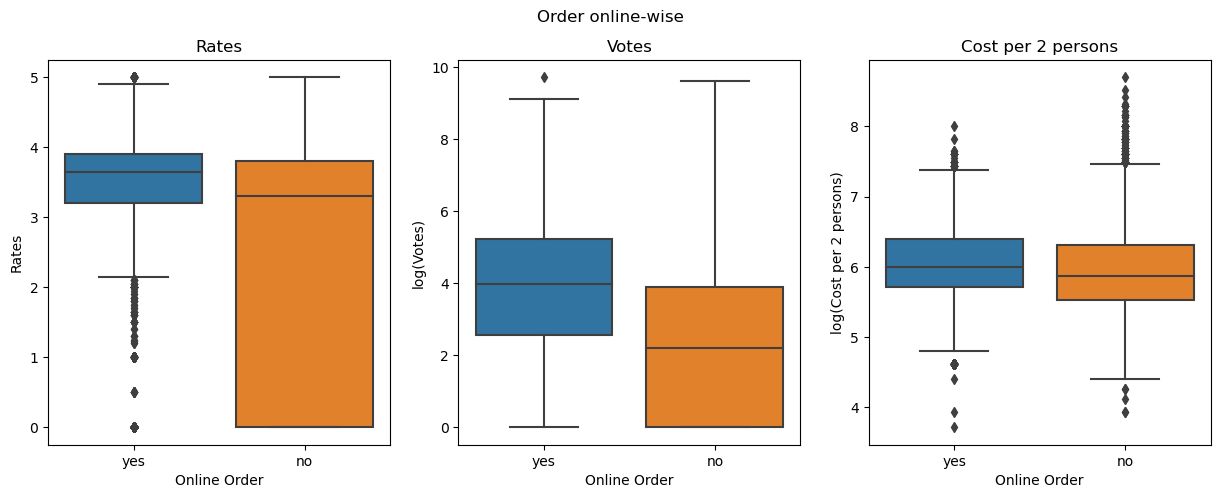

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))

plt.suptitle('Order online-wise')

plt.subplot(1, 3, 1)
sns_graph = sns.boxplot(x = 'online_order', y = 'count', data = oonline_rate, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Rates')
plt.title('Rates')

plt.subplot(1, 3, 2)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_votes, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('log(Votes)')
plt.title('Votes')

plt.subplot(1, 3, 3)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_cost, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('log(Cost per 2 persons)')
plt.title('Cost per 2 persons')

plt.show()

Restaurants with table booking option tends to have consistent ratings in the range 3.9 to 4.3 which are good ratings and variation in ratings is very less; its between 3.4 to 4.8. However, the ratings varies a lot for the restaurants without booking table option which is between 2.5 to 5 despite of observing maximum rating 5 which is not the case with restaurants which allow table booking.

Even the no. of votes received by the restaurants with table booking option is more compared to the restaurants which do not have table booking option.

Range of cost per 2 persons is 400 to 1700 rupees for the restaurants with table booking option when compared to restaurants without table booking option which is 0 to 800. With cost per 2 persons "with" and "without" table booking option overlapping each other, we may say that the customers with overall budget within 800 will go with restaurants with table booking option. Again, it all depends on the quality and quantity of food that is available with the price range in the restaurants with table booking option compared to one without table booking option.

Customer feedback is the most important and only way through which restaurants are rated and voted by the customer. Restaurants which aim at providing best-of-the-best service to their customer and continue to grow their business take due care in collecting feedback from the customers on regular basis.

In [85]:
booktable_avgrate = df.loc[:, ['location', 'name', 'address', 'book_table', 'avg_cust_rate']]
booktable_avgrate = booktable_avgrate.drop_duplicates()
booktable_avgrate.reset_index(inplace = True, drop = True)
booktable_avgrate = pd.DataFrame(booktable_avgrate.groupby(['location', 'name', 'address', 'book_table'])['avg_cust_rate'].mean())
booktable_avgrate.rename(index = str, columns = {'avg_cust_rate':'count'}, inplace = True)
booktable_avgrate.reset_index(inplace = True)
# booktable_avgrate
# booktable_avgrate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [86]:
booktable_ratenum = df.loc[:, ['location', 'name', 'address', 'book_table', 'no_of_rates']]
booktable_ratenum = booktable_ratenum.drop_duplicates()
booktable_ratenum.reset_index(inplace = True, drop = True)
booktable_ratenum = pd.DataFrame(booktable_ratenum.groupby(['location', 'name', 'address', 'book_table'])['no_of_rates'].sum())
booktable_ratenum.rename(index = str, columns = {'no_of_rates':'count'}, inplace = True)
booktable_ratenum.reset_index(inplace = True)
booktable_ratenum['log_count'] = np.log(booktable_ratenum['count'] + 1)
# booktable_ratenum
# booktable_ratenum.sort_values(by = ['location', 'name', 'address'], axis = 0)

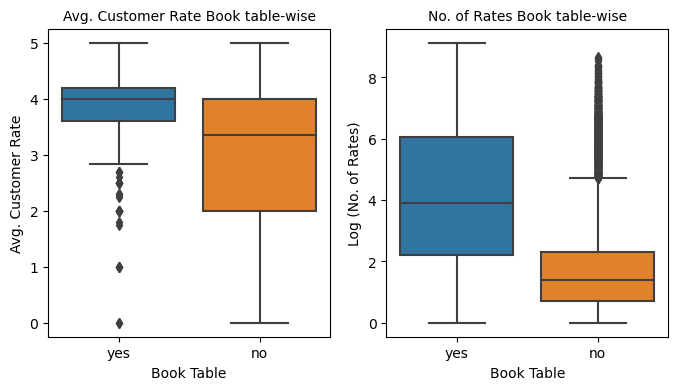

In [87]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
sns_graph = sns.boxplot(x = 'book_table', y = 'count', data = booktable_avgrate, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Avg. Customer Rate')
plt.title('Avg. Customer Rate Book table-wise', fontsize = 'medium')

plt.subplot(1, 2, 2)
sns_graph = sns.boxplot(x = 'book_table', y = 'log_count', data = booktable_ratenum, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Log (No. of Rates)')
plt.title('No. of Rates Book table-wise', fontsize = 'medium')
plt.show()

Average Customer Rate and No. of Rates are higher for the restaurants with book table option. Though many of the restaurants (with no book table option) have received rates in closer range, range of no. of rates received by restaurants with book table option tops.

In [88]:
oonline_avgrate = df.loc[:, ['location', 'name', 'address', 'online_order', 'avg_cust_rate']]
oonline_avgrate = oonline_avgrate.drop_duplicates()
oonline_avgrate.reset_index(inplace = True, drop = True)
oonline_avgrate = pd.DataFrame(oonline_avgrate.groupby(['location', 'name', 'address', 'online_order'])['avg_cust_rate'].mean())
oonline_avgrate.rename(index = str, columns = {'avg_cust_rate':'count'}, inplace = True)
oonline_avgrate.reset_index(inplace = True)
# oonline_avgrate
# oonline_avgrate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [89]:
oonline_ratenum = df.loc[:, ['location', 'name', 'address', 'online_order', 'no_of_rates']]
oonline_ratenum = oonline_ratenum.drop_duplicates()
oonline_ratenum.reset_index(inplace = True, drop = True)
oonline_ratenum = pd.DataFrame(oonline_ratenum.groupby(['location', 'name', 'address', 'online_order'])['no_of_rates'].sum())
oonline_ratenum.rename(index = str, columns = {'no_of_rates':'count'}, inplace = True)
oonline_ratenum.reset_index(inplace = True)
oonline_ratenum['log_count'] = np.log(oonline_ratenum['count'] + 1)
# oonline_ratenum
# oonline_ratenum.sort_values(by = ['location', 'name', 'address'], axis = 0)

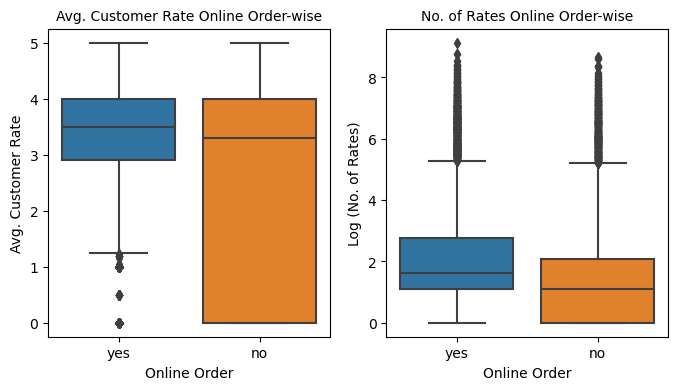

In [90]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
sns_graph = sns.boxplot(x = 'online_order', y = 'count', data = oonline_avgrate, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Avg. Customer Rate')
plt.title('Avg. Customer Rate Online Order-wise', fontsize = 'medium')

plt.subplot(1, 2, 2)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_ratenum, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Log (No. of Rates)')
plt.title('No. of Rates Online Order-wise', fontsize = 'medium')

plt.show()

Average Customer Rate and No. of Rates are higher for the restaurants with Online Order option.

In [93]:
oonlineyes_bookyes_rate_df = df.loc[(df['online_order'] == 'yes') & (df['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'rate']]
oonlineyes_bookyes_rate_df = oonlineyes_bookyes_rate_df.drop_duplicates()
oonlineyes_bookyes_rate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_rate_df = pd.DataFrame(oonlineyes_bookyes_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineyes_bookyes_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineyes_bookyes_rate_df.reset_index(inplace = True)
# oonlineyes_bookyes_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [96]:
oonlineno_bookyes_rate_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'rate']]
oonlineno_bookyes_rate_df = oonlineno_bookyes_rate_df.drop_duplicates()
oonlineno_bookyes_rate_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_rate_df = pd.DataFrame(oonlineno_bookyes_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineno_bookyes_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineno_bookyes_rate_df.reset_index(inplace = True)
# oonlineno_bookyes_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [97]:
oonlineyes_bookno_rate_df = df.loc[(df['online_order'] == 'yes') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'rate']]
oonlineyes_bookno_rate_df = oonlineyes_bookno_rate_df.drop_duplicates()
oonlineyes_bookno_rate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_rate_df = pd.DataFrame(oonlineyes_bookno_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineyes_bookno_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineyes_bookno_rate_df.reset_index(inplace = True)
# oonlineyes_bookno_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [98]:
oonlineno_bookno_rate_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'rate']]
oonlineno_bookno_rate_df = oonlineno_bookno_rate_df.drop_duplicates()
oonlineno_bookno_rate_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_rate_df = pd.DataFrame(oonlineno_bookno_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineno_bookno_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineno_bookno_rate_df.reset_index(inplace = True)
# oonlineno_bookno_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

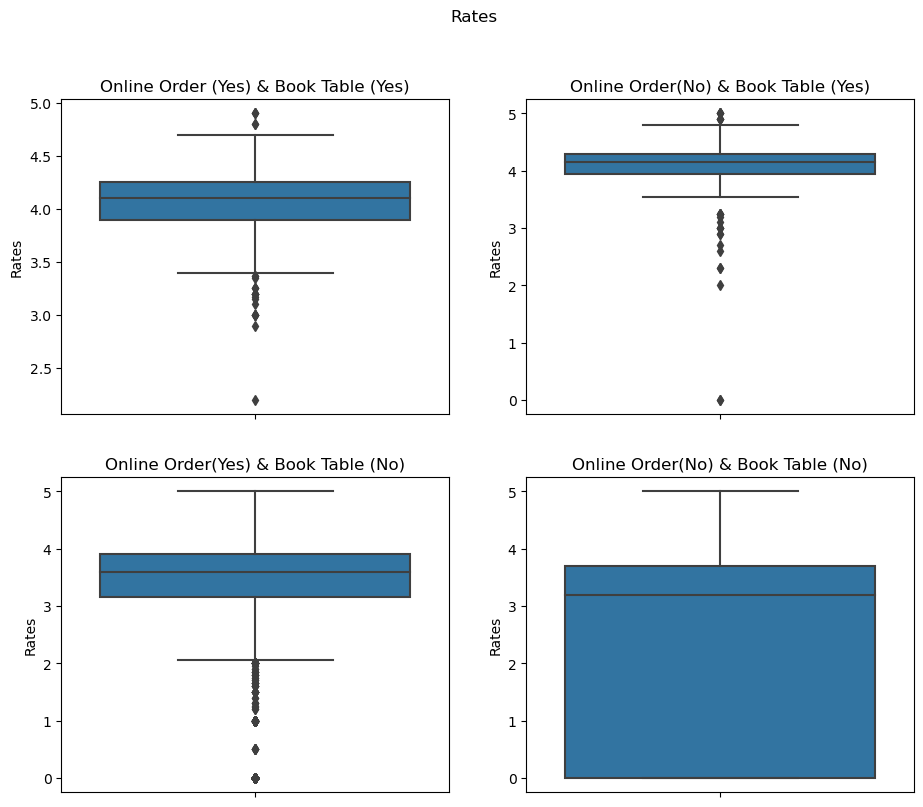

In [99]:
plt.figure(figsize = (11, 9))

plt.suptitle('Rates')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookyes_rate_df)
plt.ylabel('Rates')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookyes_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookno_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookno_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

Restaurants that allow their customers to book table irrespective of whether restaurants take orders online or not have received very good ratings from their customers. And the reason for this could be the utmost care taken by these restaurants in understanding and serving the needs of the customers and gathering customer feedbacks.

In [100]:
oonlineyes_bookyes_votes_df = df.loc[(df['online_order'] == 'yes') & (df['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'votes']]
oonlineyes_bookyes_votes_df = oonlineyes_bookyes_votes_df.drop_duplicates()
oonlineyes_bookyes_votes_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_votes_df = pd.DataFrame(oonlineyes_bookyes_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineyes_bookyes_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineyes_bookyes_votes_df.reset_index(inplace = True)
oonlineyes_bookyes_votes_df['log_aggr_val'] = np.log(oonlineyes_bookyes_votes_df['aggr_val'] + 1)
# oonlineyes_bookyes_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [101]:
oonlineno_bookyes_votes_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'votes']]
oonlineno_bookyes_votes_df = oonlineno_bookyes_votes_df.drop_duplicates()
oonlineno_bookyes_votes_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_votes_df = pd.DataFrame(oonlineno_bookyes_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineno_bookyes_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineno_bookyes_votes_df.reset_index(inplace = True)
oonlineno_bookyes_votes_df['log_aggr_val'] = np.log(oonlineno_bookyes_votes_df['aggr_val'] + 1)
# oonlineno_bookyes_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [102]:
oonlineyes_bookno_votes_df =df.loc[(df['online_order'] == 'yes') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'votes']]
oonlineyes_bookno_votes_df = oonlineyes_bookno_votes_df.drop_duplicates()
oonlineyes_bookno_votes_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_votes_df = pd.DataFrame(oonlineyes_bookno_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineyes_bookno_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineyes_bookno_votes_df.reset_index(inplace = True)
oonlineyes_bookno_votes_df['log_aggr_val'] = np.log(oonlineyes_bookno_votes_df['aggr_val'] + 1)
# oonlineyes_bookno_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [103]:
oonlineno_bookno_votes_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'votes']]
oonlineno_bookno_votes_df = oonlineno_bookno_votes_df.drop_duplicates()
oonlineno_bookno_votes_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_votes_df = pd.DataFrame(oonlineno_bookno_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineno_bookno_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineno_bookno_votes_df.reset_index(inplace = True)
oonlineno_bookno_votes_df['log_aggr_val'] = np.log(oonlineno_bookno_votes_df['aggr_val'] + 1)
# oonlineno_bookno_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

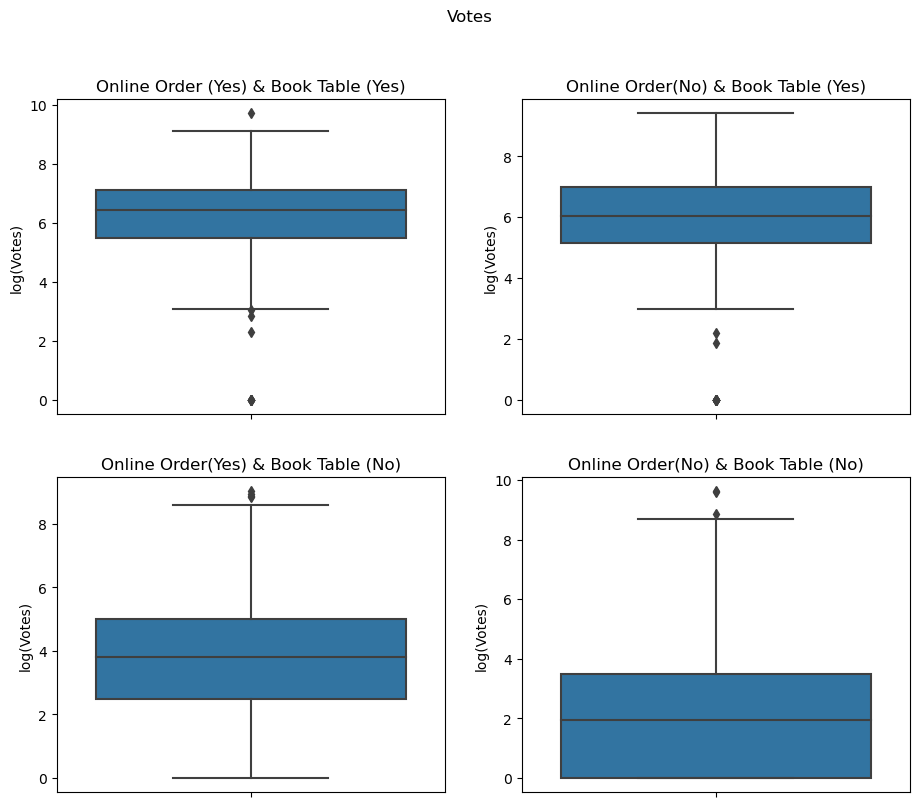

In [104]:
plt.figure(figsize = (11, 9))

plt.suptitle('Votes')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookyes_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookno_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookno_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

In [111]:
oonlineno_bookyes_cost_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineno_bookyes_cost_df = oonlineno_bookyes_cost_df.drop_duplicates()
oonlineno_bookyes_cost_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_cost_df = pd.DataFrame(oonlineno_bookyes_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineno_bookyes_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineno_bookyes_cost_df.reset_index(inplace = True)
oonlineno_bookyes_cost_df['log_aggr_val'] = np.log(oonlineno_bookyes_cost_df['aggr_val'] + 1)
# oonlineno_bookyes_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)


In [112]:
oonlineyes_bookno_cost_df = df.loc[(df['online_order'] == 'yes') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineyes_bookno_cost_df = oonlineyes_bookno_cost_df.drop_duplicates()
oonlineyes_bookno_cost_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_cost_df = pd.DataFrame(oonlineyes_bookno_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineyes_bookno_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineyes_bookno_cost_df.reset_index(inplace = True)
oonlineyes_bookno_cost_df['log_aggr_val'] = np.log(oonlineyes_bookno_cost_df['aggr_val'] + 1)
# oonlineyes_bookno_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [113]:
oonlineno_bookno_cost_df = df.loc[(df['online_order'] == 'no') & (df['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineno_bookno_cost_df = oonlineno_bookno_cost_df.drop_duplicates()
oonlineno_bookno_cost_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_cost_df = pd.DataFrame(oonlineno_bookno_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineno_bookno_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineno_bookno_cost_df.reset_index(inplace = True)
oonlineno_bookno_cost_df['log_aggr_val'] = np.log(oonlineno_bookno_cost_df['aggr_val'] + 1)
# oonlineno_bookno_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

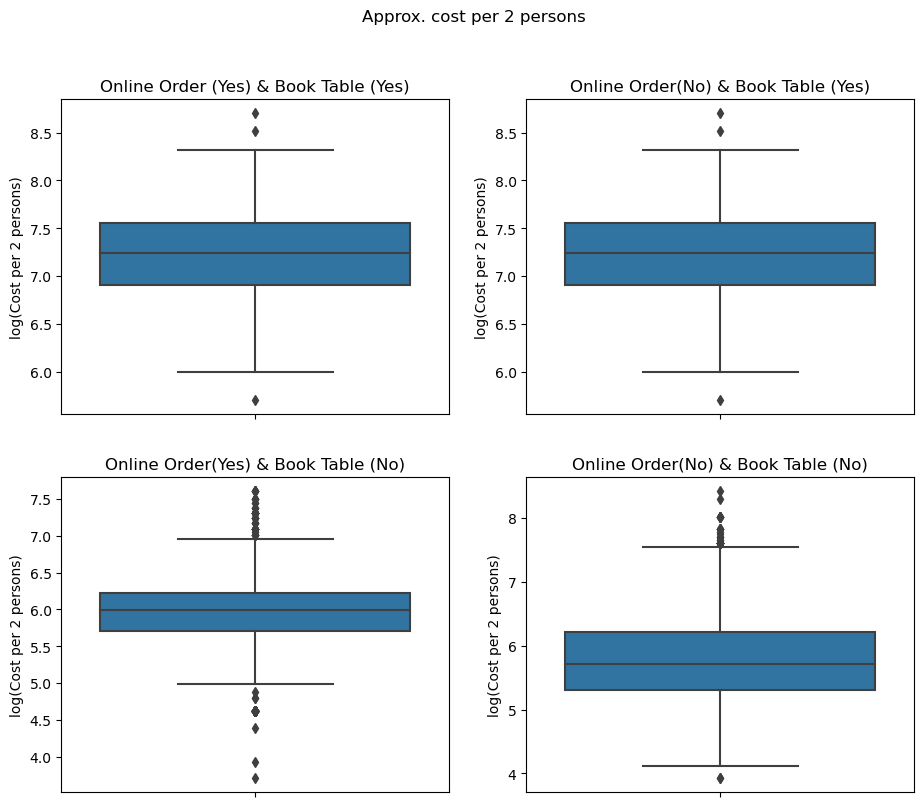

In [115]:
plt.figure(figsize = (11, 9))

plt.suptitle('Approx. cost per 2 persons')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookno_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookno_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

In [116]:
loc_rest_count_df = df[['location', 'name']].drop_duplicates(subset = ['location', 'name'])
loc_rest_count_df = pd.DataFrame(loc_rest_count_df.groupby('location')['name'].count())
loc_rest_count_df.reset_index(inplace = True)
loc_rest_count_df.rename(index = str, columns = {'name':'count'}, inplace = True)
loc_rest_count_df = loc_rest_count_df.sort_values(by = 'count', ascending = False)
loc_rest_count_df.reset_index(inplace = True, drop = True)
loc_rest_count_top10_df = loc_rest_count_df.loc[loc_rest_count_df.index <= 9, ]
# loc_rest_count_top10_df

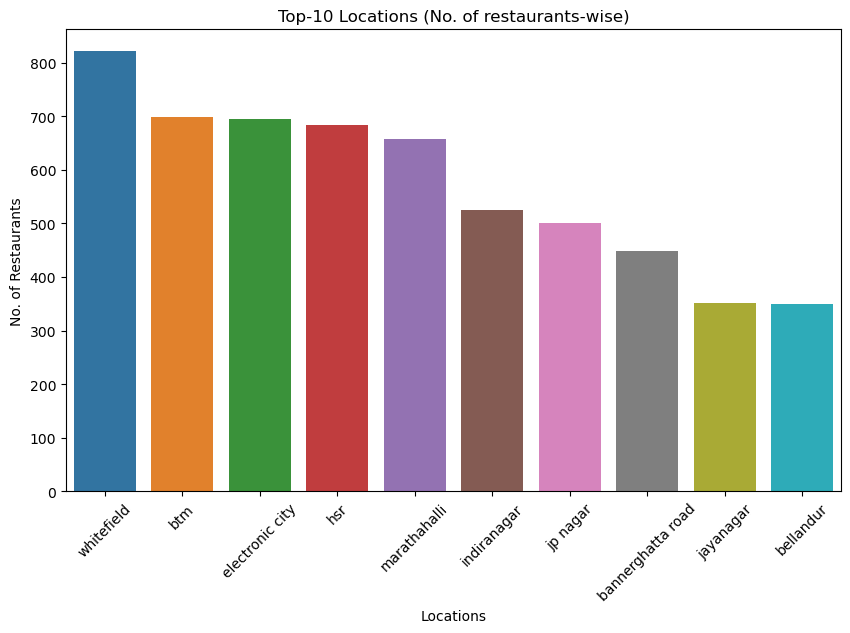

In [121]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_rest_count_top10_df)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (No. of restaurants-wise)')
plt.show()

In the above graph, we can see top-10 locations in Bengaluru based on the number of restaurants in each of these locations. In Bengaluru, you will come across localities which are very well known for being:

In [122]:
loc_name_addr_oonline = df.loc[df['location'].isin(loc_rest_count_top10_df['location']), 
                                        ['location', 'name', 'address', 'online_order']]
loc_name_addr_oonline = loc_name_addr_oonline.drop_duplicates()
loc_name_addr_oonline.reset_index(inplace = True, drop = True)
loc_name_addr_oonline = pd.DataFrame(loc_name_addr_oonline.groupby(['location', 'online_order'])['location'].count())
loc_name_addr_oonline.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_oonline.reset_index(inplace = True)
# loc_name_addr_oonline

NameError: name 'show_values_on_bars' is not defined

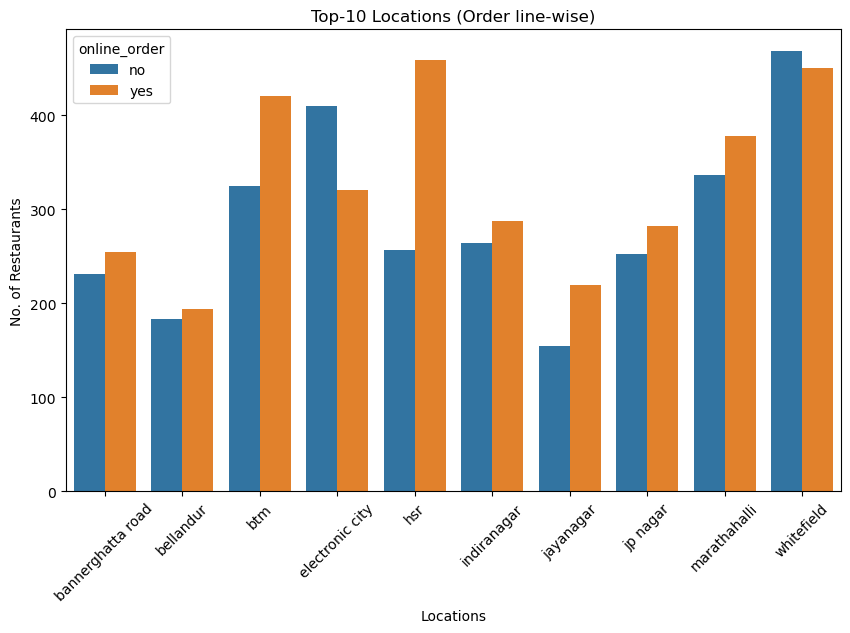

In [125]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_oonline, hue = 'online_order')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (Order line-wise)')
plt.show()

Electronic city and Whitefield are the only two localities out of top-10 localities list where we find more number of restaurants which do not take online orders. In remaining 8 locations, we find more restaurants which take online orders compared to the one which do not provide this facility

In [126]:
loc_name_addr_book = df.loc[df['location'].isin(loc_rest_count_top10_df['location']), 
                                        ['location', 'name', 'address', 'book_table']]
loc_name_addr_book = loc_name_addr_book.drop_duplicates()
loc_name_addr_book.reset_index(inplace = True, drop = True)
loc_name_addr_book = pd.DataFrame(loc_name_addr_book.groupby(['location', 'book_table'])['location'].count())
loc_name_addr_book.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_book.reset_index(inplace = True)
# loc_name_addr_book

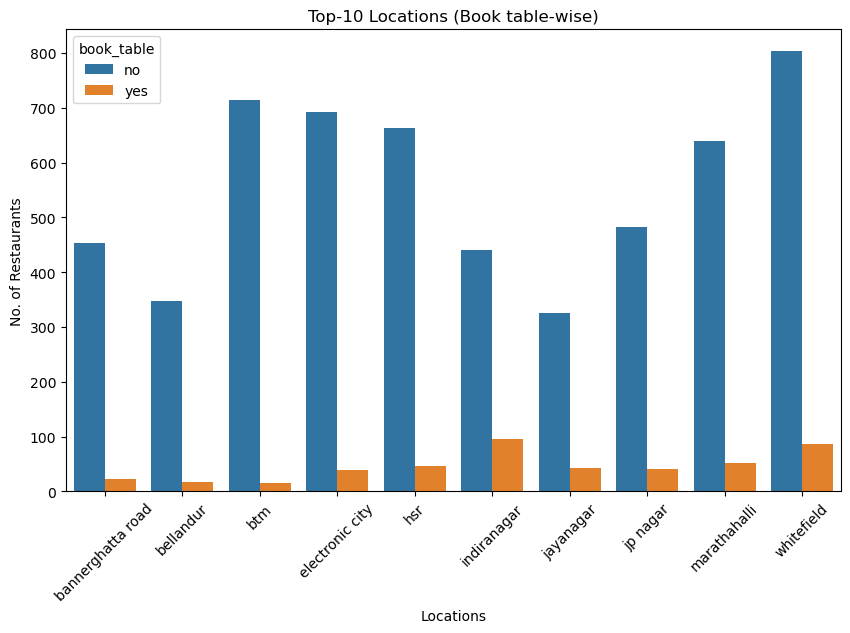

In [128]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_book, hue = 'book_table')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (Book table-wise)')
plt.show()

In [129]:
loc_name_addr_csn =df.loc[df['location'].isin(loc_rest_count_top10_df['location']), 
                                         ['location', 'name', 'address', 'cuisines']]
loc_name_addr_csn = loc_name_addr_csn.drop_duplicates()
loc_name_addr_csn.reset_index(inplace = True, drop = True)
loc_name_addr_csn = pd.DataFrame(loc_name_addr_csn.groupby(['location', 'cuisines'])['location'].count())
loc_name_addr_csn.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_csn.reset_index(inplace = True)
loc_name_addr_csn['rank'] = loc_name_addr_csn.groupby('location')['count'].rank(ascending = False, method = 'max')
loc_name_addr_csn = loc_name_addr_csn.loc[loc_name_addr_csn['rank'] <= 3, ]
# loc_name_addr_csn.sort_values(by = ['location', 'name'], axis = 0)
# loc_name_addr_csn

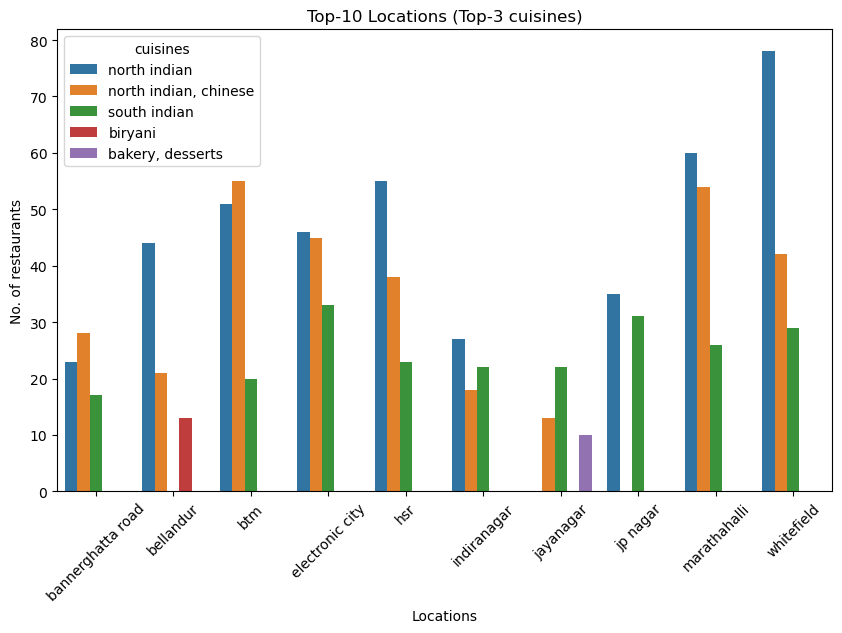

In [132]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_csn, hue = 'cuisines')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of restaurants')
plt.title('Top-10 Locations (Top-3 cuisines)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

Observations:

More number of restaurants in localities Bellandur, HSR, Indiranagar, JP Nagar and Whitefield serve North Indian cuisine food.
Also, number of restaurants in localities Bannerghatta road, BTM and Electronic City serve Chinese, North Indian cuisine food.
South Indian cuisine food is served in restaurants in the localities HSR, Indiranagar, Jayanagar, JP Nagar and Marathahalli.

Customer Point of View:

Restaurants which are nearest to the customer should be first choice of the customers.
Be it booking table for a specific number of guests at a restaurant or place the order online, the customer is advised to look at the no. of votes the restaurant has received along with overall rate and individual review rates and comments while choosing a restaurant.
If the food of interest is available in restauants in the listed locations then, the restaurants have to be chosen based on how far the restaurant is situated from your place. Because, the distance of the restaurant from your place determines total time taken to deliver the orders in case of orders placed online and the time required for you to reach that place in case if table has been booked.
Out of top-10 locations in Bengaluru:
(a) BTM, HSR, Indiranagar & Jayanagar have more number of restaurants with ratings ranging between 3 to 4.
(b) Indiranagar and Jayanagar have restaurants which have received maximum number of votes.
(c) Quick Bites and Casual Dining restaurants are the most popular among the largest population in the city.
(d) For North Indian cuisine food Bellandur, HSR, Indiranagar, JP Nagar and Whitefield have got greater number of choices.
(e) For Chinese, North Indian cuisine food, Bannerghatta road, BTM and Electronic City are the places to go for.
(f) For South Indian cuisine food, you will find more choices in HSR, Indiranagar, Jayanagar, JP Nagar and Marathahalli localities.
(g) Bellandur, HSR, BTM, Electronic city and JP nagar are the localities where you will find restaurants which take orders online and allow customer to takeaway the order on their own. Generally, the takeaway orders which are placed online are given very good discounts on the total price of the order and customers generally prefer takeaway orders if the restaurant is situated with-in reach of the customer locality.
(h) If we set 3 to 5 as cut-off for restaurant rates then, Jayanagar, JP nagar, Marathahalli, Whitefield, HSR, BTM & Bannerghatta road are localities where you can find restaurants which are economical, good rated and voted. However, you will also come across restaurants which have not received votes yet.
Restaurant Point of View

Locations are chosen to open any restaurant based on:

The restaurants present in that locality - its food cuisine, type of restaurant, features & price range of food. These parameters define the measure of competitiveness for the to-be-open restaurants.
Apart from serving customers in own locality (locality in which the restaurant is situated), restaurants always aim at serving more and more customers in the nearby localities. No. of nearby localities restaurant can serve defines the measure connectivity.
Among top-10 locations of Bengaluru:

From competitiveness and connectivity (orders received from neighboring locations) perspectives:
a. Marathahalli, HSR, Whitefield and BTM are the localities higher competitivenss and higher connectivity to neighboring localities.
b. Bannerghatta road, Jayanagar and Indiranagar have higher connectivity and lower competition.
As the restaurant reaches to more and more customers, the no. of votes increase automatically.
As the quality of service of such widely hubbed restaurants increases, the no. of "very good rated" votes also increase.
Restaurants with food delivery service along with dine-out with desserts seems to be growing well in the business.
Restaurants that serve bakery items and desserts seems to be having opportunity to open in 8 locations of top-10 locations in the city.
Bannerghatta road, Bellandur, Indiranagar, Jayanagar and JP nagar are the locations where we find less number of restaurants serving chinese, north indian and south indian cuisine food. Any new restaurants who wish to serve any or all of these cuisine foods have better chances of establishing themselves in these locations.